<h3><center>(20/09) MScFE 650 Machine Learning (C20-S1)</center></h3> 
<center>Groupwork Assignment Submission 1 M3</center> 	
<center>Timezone Group 4 - D</center>
<center>4 December 2020</center>


<strong><center>Group Members</center></strong>

|Name|E-mail Address|Non-Contributing members|
|:-|:-|:-|
|Jean-Paul Erasmus|jpberasmus@gmail.com||
|Tilemachos Kosmetsas|kosmetsastilemahos@yahoo.com||
|Christos Koutkos|christoskoutkos@msn.com||

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats

### 1.1. What is an Exchange-Traded Fund (ETF)?

An ETF, or an Exchange-Traded Fund is a financial instrument, being traded just like stocks, that attempts to track the performance of a market index such as the S&P 500. In other words, an ETF is a collection or a "basket of securities", that is created with the purpose of tracking other financial products, such as the Dow Jones Industrial Average or many other actively or passively managed group of securities or commodities. ETF's aim is to mimic/replicate the behavior and returns of these assets.

ETFs seek to achieve their stated objectives, but a significant tracking difference can exist over longer periods of time, due to fees, index changes, over/under-sampling, etc.

An ETF must calculate its Net Asset Value on every business day, typically on the market close, but the “shares” of an ETF can be traded on an estimated price throughout the day. This is possible because of the distinctive creation/redemption structure of ETFs.

ETFs tend to be cost-effective, liquid, diversified and have favourable tax benefits, which have made them popular investment vehicles over the last decade (Singal, V).

### 2.1. Import the data from the provided .csv file.

In [2]:
#We use pandas to import the data
dataset = pd.read_csv('GWP Submission 1_Data.csv')

#Transform the 'Date' column from string to 'Datetime Object'
dataset['Date'] = pd.to_datetime(dataset['Date'])

#Setting the 'Date' colunm as index
dataset = dataset.set_index('Date')

#Display the first 5 rows
dataset.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,8566.71,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
2016-01-08,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,8183.00,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2016-01-15,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,7755.73,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
2016-01-22,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,8035.69,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
2016-01-29,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,8211.17,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88


### 1.2. Pick one of the funds in the data set and find the weightings.  Show in Python table

In [3]:
'''We have chosen the MSCI SOUTH AFRICA INDEX WEIGHT. According to the latest published document:
https://www.msci.com/documents/10199/d2021dc7-efe2-4389-981a-f2e2eb5c25f6 
We have created the following weight table with its' top ten constituents.
'''
#Create index columns
msci_index = ['MSCI SOUTH AFRICA INDEX WEIGHT']

#Create a list of stock names  
stocks = [
'NASPERS N',
'FIRSTRAND',
'STANDARD BANK GROUP',
'ANGLOGOLD ASHANTI', 
'IMPLALA PLATINUM HOLDINGS', 
'SIBANYE STILLWATER',
'GOLD FIELDS' ,
'MTN GROUP',
'SANLAM' ,
'BIRD CORPORATION'
]

#Create a list of stock weights 
percentage = [
 35.09
,5.58
,4.04
,3.50 
,3.35
,3.02
,2.99
,2.89
,2.54
,2.41
]

#Create a dataframe with the above data
weight = pd.DataFrame(percentage, index = stocks, columns = msci_index)

#Display the dataframe
weight

,MSCI SOUTH AFRICA INDEX WEIGHT
NASPERS N,35.09
FIRSTRAND,5.58
STANDARD BANK GROUP,4.04
ANGLOGOLD ASHANTI,3.50
IMPLALA PLATINUM HOLDINGS,3.35
SIBANYE STILLWATER,3.02
GOLD FIELDS,2.99
MTN GROUP,2.89
SANLAM,2.54
BIRD CORPORATION,2.41


### 3.1. Summarize the min, max, mean, median, and standard deviation of each column.

In [4]:
#Concatenate the various datapoints using build in functions
info = (pd.concat([dataset.min(), dataset.max(), dataset.mean(), dataset.median(), dataset.std()],axis=1, sort=False))

#Add column names
info.columns = ['Min','Max','Mean','Median','Standard Deviation']

#Display
info.head()

,Min,Max,Mean,Median,Standard Deviation
LUXXX,871.50,1812.0100,1457.231905,1491.08100,238.611226
MSCI ARGENTINA,844.09,4467.4100,2526.652262,2541.97500,899.378857
BLP ORIENTE MEDIO,1722.87,3750.8655,3029.482978,3113.41405,516.678825
MSCI AUSTRALIA,957.15,1431.4600,1183.940159,1177.37500,101.261295
MSCI AUSTRIA,78.29,177.5800,127.418889,130.63500,24.770889


### 4.1. Write a Python function that graphs 1 time series with appropriate time labels

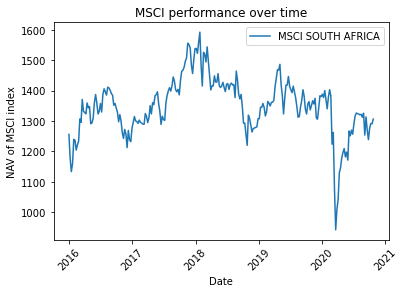

In [5]:
#Use matplotlib to plot the timeseries data

def plot_1_graph(column):
    '''
    Here a function was created to plot one time series. The function takes the time series as an argument. 
    To demonstrate, we plot MSCI SOUTH AFRICA
    '''
    plt.plot(dataset[column], label=column)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('NAV of MSCI index')
    plt.title('MSCI performance over time')
    plt.legend()
    plt.show()

plot_1_graph('MSCI SOUTH AFRICA')

### 4.2. Write a Python function that graphs 2 time series on the same plot, with labels

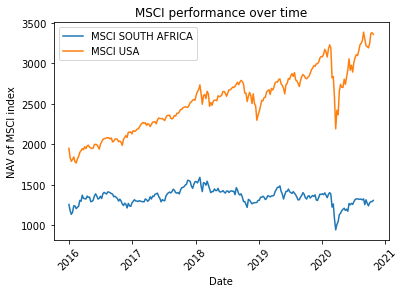

In [6]:
#Use matplotlib to plot the timeseries data

def plot_2_graphs(column1, column2):
    ''' The function takes two time series as arguments, and plots them simultaneuously with labels'''
    plt.plot(dataset[column1], label=column1)
    plt.plot(dataset[column2], label=column2)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('NAV of MSCI index')
    plt.title('MSCI performance over time')
    plt.legend()
    plt.show()

plot_2_graphs('MSCI SOUTH AFRICA', 'MSCI USA')

### 4.3. Write a Python function that compares the two-return series

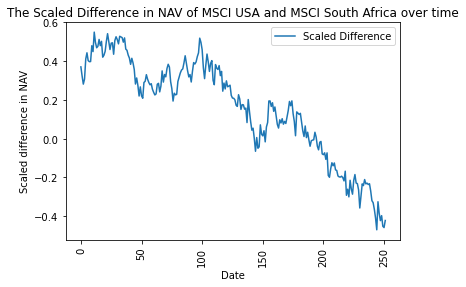

In [7]:
#The below graph indicated a scaled difference between the NAV of the MSCI USA  index and MSCI South Africa index over time

#1. We start by scaling all of the data

#scaled = dataset.drop(['Date'], axis=1) #Drop the date column
scaled = pd.DataFrame(MinMaxScaler().fit_transform(dataset)) #Scale the data
#scaled = pd.concat([dataset['Date'], scaled], axis = 1) #Add back the date column
scaled.columns = dataset.columns

#2. Calculate the difference between the two stated indices

difference = scaled['MSCI SOUTH AFRICA'].sub(scaled['MSCI USA'],fill_value=0)  
#difference = pd.concat([dataset['Date'], difference], axis = 1) #Add back the date column

#3. Use matplotlib to plot the differenced timeseries data

plt.plot(difference, label='Scaled Difference')
plt.xlabel('Date')
plt.xticks(rotation=90)
#plt.xticks(np.arange(0, len(dataset['Date'])+1, 10))
plt.ylabel('Scaled difference in NAV')
plt.title('The Scaled Difference in NAV of MSCI USA and MSCI South Africa over time')
plt.legend()
plt.show()

### 5. Correlation

In [8]:
#We start by picking 8 random indices and creating both an array and a dataframe, because different libraries require different formats.

corrdataframe = pd.DataFrame({1: dataset['MSCI ARGENTINA'], 2: dataset['MSCI AUSTRALIA'], 3: dataset['MSCI BELGIUM'], 4: dataset['MSCI BRAZIL'], 5: dataset['MSCI CHINA'], 6: dataset['MSCI KOREA'], 7: dataset['MSCI SOUTH AFRICA'], 8: dataset['MSCI USA']})
corrdataarray = np.array([dataset['MSCI ARGENTINA'], dataset['MSCI AUSTRALIA'], dataset['MSCI BELGIUM'], dataset['MSCI BRAZIL'], dataset['MSCI CHINA'], dataset['MSCI KOREA'], dataset['MSCI SOUTH AFRICA'], dataset['MSCI USA']])

### 5.1. Pick 8 of the columns.  Compute all the pairwise correlations using Pearson correlation

The 8 indices that we will analyse is:

1. MSCI ARGENTINA, 
2. MSCI AUSTRALIA, 
3. MSCI BELGIUM, 
4. MSCI BRAZIL, 
5. MSCI CHINA, 
6. MSCI KOREA, 
7. MSCI SOUTH AFRICA, 
8. MSCI USA.

$$Pearson^\prime s\ \rho=\frac{cov\left(X,Y\right)}{\sigma\left(X\right)\sigma\left(Y\right)}$$

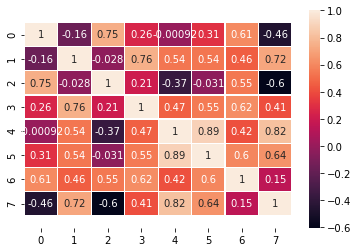

In [9]:
#Calculating the Pearson correlation coefficient
pearsoncor = np.corrcoef(corrdataarray)

#Display the data in a heatmap
ax = sns.heatmap(pearsoncor, linewidth=0.2, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### 5.2. Recompute the calculation, instead using Spearman correlation

$$ \text{Spearman's  } \rho =1 - \frac{6\sum d_{i}^{2}}{n(n^2-1)}$$
where $d_i$ is the difference between the ranking of $x_i$ and $y_i$: 
$$d_i = r(x_i)-r(y_i)$$ 

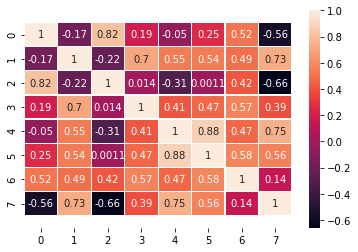

In [10]:
#We are using the Seaborn module to visualize the covariance between the variables selected.
#Calculating the Spearman correlation coefficient and p statistic.
spearcorr, spearcorr_p_value = np.asarray(spearmanr(corrdataframe))

#Display the data in a heatmap
ax = sns.heatmap(spearcorr, linewidth=0.2, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### 5.3. Recompute the calculation, instead of using Kendall correlation

While Pearson's corelation takes raw data into account, Spearmans correlation and Kendal's tau, take into account the ranking of the variables and the concordant and discordant pairs accordingly. We notice that taking only the rank of each value into account, the covariance appears to be more significant, while Kendals Tau produces "looser" dependencies.$$\tau= \frac{P-Q}{n\left(n-1\right)/2}$$

$P= number \ of \ concodant \ pairs,$
$Q = number \ of \ discordant \ pairs$

While Pearson's corelation takes raw data into account, Spearmans correlation and Kendal's tau, take into account the ranking of the variables and the concordant and discordant pairs accordingly. We notice that taking only the rank of each value into account, the covariance appears to be more significant, while Kendals Tau produces "looser" dependencies.

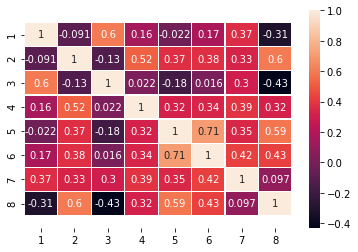

In [11]:
#Calculating Kendall's Tau
kendalltaucorr = corrdataframe.corr(method='kendall')

#Display the data in a heatmap
ax = sns.heatmap(kendalltaucorr, linewidth=0.2, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

### 6.1. Choose one of the 35 variables to serve as your response variable (e.g., LUXXX)

In [12]:
#We have chosen the MSCI SOUTH AFRICA INDEX as our response variable
y = dataset['MSCI SOUTH AFRICA']

#Droping the response variable from the dataset that we will use to train the models
dataset_droped = dataset.drop(columns='MSCI SOUTH AFRICA')

In [13]:
#We are taking the first differences, on our dataset's time series.
level_changes = dataset_droped.diff().iloc[1:,:]
level_changes.head()

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,-99.449,-115.44,-245.2467,-63.23,-9.04,-6.03,-84.22,-77.09,-4.84,-383.71,...,-2.10,-163.79,-60.87,-16.68,-70.1501,-7.40,-746.72,-73.07,-96.40,-117.82
2016-01-15,-34.181,-43.35,-162.3702,-20.18,-4.12,-2.03,-47.37,-45.10,-3.09,-427.27,...,0.25,-113.78,-30.86,-43.60,-64.6800,-3.66,-347.61,-19.29,-29.57,-42.32
2016-01-22,-2.919,64.48,-183.2304,0.49,2.25,3.41,-25.47,41.02,-0.39,279.96,...,-1.72,77.95,25.73,22.99,-22.9300,1.87,426.75,20.47,27.18,24.56
2016-01-29,44.073,180.21,199.0163,19.69,1.14,2.32,79.80,56.74,0.98,175.48,...,0.23,41.33,79.22,33.49,25.0500,0.85,-36.65,10.69,54.79,29.76
2016-02-05,-23.608,16.72,96.4074,-4.64,-2.52,-6.82,23.62,-12.17,-1.25,-620.96,...,0.69,9.64,8.14,-12.93,3.8100,-3.47,-172.87,-45.05,-67.52,-59.15


### 7.1. What do these 2 methodologies have in common?

1.	Both methods help in reducing the dimensions of the variables. 

2.	When considering the PCA regression method and the LASSO method, both models can be used to regress data.


### 7.2. How do these 2 methodologies differ?

1.	LASSO is a penalized regression models, meaning that if a if the coefficient of the linear regression associated is below the threshold, then the coefficient is set to zero, meaning it is disregarded. Whereas PCA is smoother because it will provide vectors that are a linear combination of all the features.

2.	LASSO is a regression model that has the potential to be used for feature selection. Whereas PCA is a dimensionality reduction method that aims to minimize the variance in the predictor space by using linear combinations of predictors, it helps understand your predictors by putting the most weight on the more important predictors.

### 8.1. Principal Components

In [14]:
#Initiating and fitting the PCA model
PCA_analysis = PCA()
PCA_analysis.fit(level_changes)

PCA()

In [15]:
'''
Below is the set of eigenvalues(descending order-meaning most important ones come first), 
of our var-covariance matrix based on our dataset "level_changes"
'''
PCA_analysis.explained_variance_

array([2.12793505e+05, 5.78321700e+04, 2.24905749e+04, 2.09871427e+04,
       1.43025315e+04, 6.83510941e+03, 4.96238175e+03, 2.06819358e+03,
       1.61908848e+03, 9.64685209e+02, 8.56541837e+02, 5.27641027e+02,
       4.42600174e+02, 3.70085677e+02, 3.43253333e+02, 2.32538062e+02,
       2.07377793e+02, 1.86227927e+02, 1.01054377e+02, 8.23461818e+01,
       2.22660591e+01, 1.51996534e+01, 9.78480779e+00, 7.07780287e+00,
       6.30250852e+00, 3.29374542e+00, 2.50830423e+00, 2.13394215e+00,
       1.67319701e+00, 1.22930209e+00, 1.02795198e+00, 5.68193980e-01,
       3.67028743e-01, 2.01113517e-01])

### 8.2. Show the amount of variation explained by the first 5 components.

In [16]:
#Below is the percentage explained by the fist 5 principal components (eigenvalues).
PCA_analysis.explained_variance_ratio_[:5].sum()

0.9429400665398449

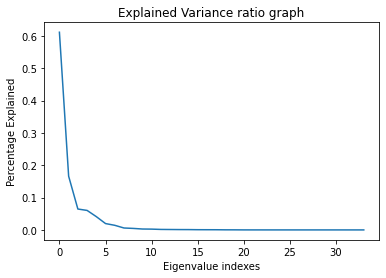

In [17]:
'''
Below is the graph of the variance explained by each eigenvalue. 
The graph shows us that the first few eigenvalues explain most of the variance (surface area below the blue line)
'''
plt.plot(PCA_analysis.explained_variance_ratio_)
plt.title('Explained Variance ratio graph')
plt.xlabel('Eigenvalue indexes')
plt.ylabel('Percentage Explained')
plt.show()

### 8.3. How many components are needed to express 80% of the variation of the data?

In [18]:
'''
We only need the first 3 principal components to explain more than 80% of the total variance
'''
PCA_analysis.explained_variance_ratio_[:3].sum()

0.8416140996172594

### 9.1. PCA Regression

In [19]:
#Performing PCA to reduce the number of features to 5
PCA_analysis_2 = PCA(n_components = 5)
PCA_analysis_2.fit(level_changes)

#From the above analysis we keep the the eigenvector matrix Q_5 based on the 5 most significant var-covariance matrix eigenvalues.
Q_5 = PCA_analysis_2.components_.T

#The transformation of our data is the projection of the dataset into the 5th dimentional space using the above eigenvector matrix
reduced_dataset = level_changes.dot(Q_5)

#The transformed dataset will look like this
pd.DataFrame(reduced_dataset).head()

,0,1,2,3,4
Date,,,,,
2016-01-08,1217.343795,85.520415,138.254359,54.253799,-139.071147
2016-01-15,641.892640,87.668379,-75.452268,-238.767968,12.928291
2016-01-22,-109.752049,-648.255837,-1.116345,-17.281939,-25.933951
2016-01-29,-411.549456,205.583215,-330.876538,133.946098,56.385955
2016-02-05,491.107366,141.531072,-46.614960,-465.793446,-127.962901


In [20]:
#We calculate the first differences of the response variable (to match our data)
y_ = np.array(np.diff(y))

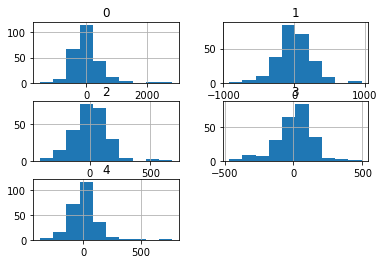

In [21]:
#Since we use the first differences, our data are close to normalized. Therefore we can perform the linear regression without further transformations
reduced_dataset.hist()
plt.show()

In [22]:
#We split our data to training and testing data
number_of_rows = level_changes.shape[0]
number_of_train_rows = int(number_of_rows*2/3)

x_train = reduced_dataset.iloc[:number_of_train_rows,:]
x_test = reduced_dataset.iloc[number_of_train_rows:,:]

yi_train = y_[:number_of_train_rows].reshape(-1,1)
yi_test = y_[number_of_train_rows:].reshape(-1,1)

In [23]:
#We perform linear regression on y_
linear_reg = LinearRegression()
linear_reg.fit(x_train, yi_train)

LinearRegression()

In [24]:
'''
We notice that not all the weights/coefficients of explanatory variables, 
have the same significance when explaining the targeted variable y_ .  w1 and w3 are way more significant
'''

print(f'The coefficients are: {linear_reg.coef_}')

The coefficients are: [[-0.05727175  0.01640233 -0.03453771  0.01731836  0.02699952]]


In [25]:
#We achieved a small intercept as our data was almost normalized.
linear_reg.intercept_

array([-0.50880822])

In [26]:
#The R^2 score implies that 64.7% of our data are explained from the above linear regression model
linear_reg.score(x_test, yi_test)

0.6472146104784434

### 10 Lasso Regression

In [27]:
#We split our data to training and testing data
train_data = level_changes.iloc[:number_of_train_rows,:]
test_data = level_changes.iloc[number_of_train_rows:,:]

#We normalize the response variable as all other data will be normalized during Lasso Regression
y_normalized = Normalizer().fit_transform([y_]).T
y_train = y_normalized[:number_of_train_rows]
y_test = y_normalized[number_of_train_rows:]

### 10.1 For the lasso, use at least 1000 different values of the penalty parameter.

In [28]:
#We perform a Lasso regression with normalizing the dataset and testing 1000 values for `alpha`.
#We used alpha values close to zero, as after multiple attempts, when alpha increases, the weights get to zero very fast.
ls = Lasso(normalize=True, max_iter = 10000)
model = GridSearchCV(ls, param_grid = {'alpha': np.linspace(1e-12,1e-01,1000)}, n_jobs=2, scoring = 'neg_mean_absolute_error', return_train_score=True, refit=True)

In [29]:
#Training our model against the normalized response variable
model.fit(train_data, y_train)

GridSearchCV(estimator=Lasso(max_iter=10000, normalize=True), n_jobs=2,
             param_grid={'alpha': array([1.00000000e-12, 1.00100101e-04, 2.00200201e-04, 3.00300301e-04,
       4.00400401e-04, 5.00500501e-04, 6.00600602e-04, 7.00700702e-04,
       8.00800802e-04, 9.00900902e-04, 1.00100100e-03, 1.10110110e-03,
       1.20120120e-03, 1.30130130e-03, 1.40140140e-03, 1.50150150e-03,
       1.60160160e-03...
       9.80980981e-02, 9.81981982e-02, 9.82982983e-02, 9.83983984e-02,
       9.84984985e-02, 9.85985986e-02, 9.86986987e-02, 9.87987988e-02,
       9.88988989e-02, 9.89989990e-02, 9.90990991e-02, 9.91991992e-02,
       9.92992993e-02, 9.93993994e-02, 9.94994995e-02, 9.95995996e-02,
       9.96996997e-02, 9.97997998e-02, 9.98998999e-02, 1.00000000e-01])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [30]:
#We extract the best parameter for the Lasso model
model.best_params_

{'alpha': 0.0001001001010990991}

In [31]:
#We predict the 'South Africa MSCI' using the trained data
predicted_SA_MSCI = model.predict(test_data)

In [32]:
#The r^2 score of the prediction using the best alpha
r2_score(y_true=y_test, y_pred=predicted_SA_MSCI)

0.7374626951942436

In order to calculate the $R^2$-score of 1000 different `alphas`, we will create a different `lasso model` for every `alpha` and we will keep the score produced against the true values of our response variable.

In [33]:
#The outcome will be a dictionary with alphas as keys and the prediction arrays as values
all_predictions = {}
alphas = np.linspace(1e-12,1e-01,1000)

for alpha in alphas:
    lasso = Lasso(normalize=True, max_iter = 10000, alpha = alpha)
    lasso.fit(train_data, y_train)
    prediction = lasso.predict(test_data)
    all_predictions[alpha] = prediction

In [34]:
#We will create a loop to score every prediction against the response variable. The scores will be saved in a dictionary with alphas as keys and scores as values.
#We will also save in a dictionary all square errors for every alpha. As above, all keys will represent alphas and all values squared errors.
all_scores = {}
all_squared_errors = {}

for alpha in all_predictions.keys():
    y_pred = all_predictions[alpha]
    score = r2_score(y_true=y_test, y_pred = y_pred)
    y_pred_reshaped = y_pred.reshape(-1,1)
    errors = y_test - y_pred_reshaped
    squared_error = errors.T.dot(errors)/1000
    all_squared_errors[alpha] = squared_error[0][0]
    all_scores[alpha]=score

### 10.2 Graph the overall model mismatch for each of the 1000 values of the penalty parameter

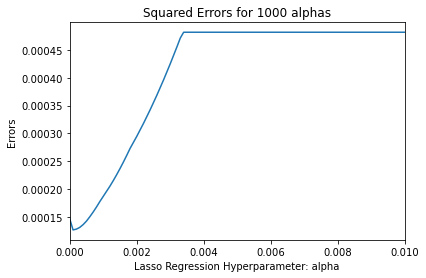

In [35]:
#Plotting the squared errors

plt.plot(all_squared_errors.keys(), all_squared_errors.values())
plt.xlim(0,0.01)
plt.title('Squared Errors for 1000 alphas')
plt.xlabel('Lasso Regression Hyperparameter: alpha')
plt.ylabel('Errors')
plt.show()

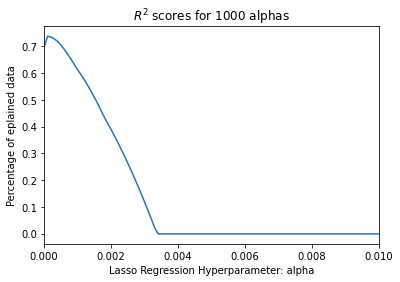

In [36]:
#Plotting the R^2 scores

plt.plot(all_scores.keys(), all_scores.values())
plt.xlim(0,0.01)
plt.title('$R^2$ scores for 1000 alphas')
plt.xlabel('Lasso Regression Hyperparameter: alpha')
plt.ylabel('Percentage of eplained data')
plt.show()

### 10.3 Find a lasso model that includes no more than 7 predictors

In [37]:
#We will find various models that keep 7 out of 34 regressors

alphas2 = np.linspace(0.000001,0.001,1000)
non_zero_weights_list = []

for alpha in alphas2:
    lasso_model= Lasso(normalize=True, alpha=alpha, max_iter = 5000)
    lasso_model.fit(train_data, y_train)
    boolean = np.array(lasso_model.coef_, dtype=bool)
    non_zero_weights = np.sum(boolean)
    if non_zero_weights <= 7:
        non_zero_weights_list.append(alpha)

In [38]:
#From the above alphas, we will keep the alpha with the highest R^2 score

scores_n_alphas = {}

for alpha in non_zero_weights_list:
    lasso_model= Lasso(normalize=True, alpha=alpha, max_iter = 5000)
    lasso_model.fit(train_data, y_train)
    y_pred = lasso_model.predict(test_data)
    score = r2_score(y_true=y_test, y_pred = y_pred)
    scores_n_alphas[alpha] = score


best_score = max(scores_n_alphas.items(), key = lambda x: x[1])
print(f'For alpha = {best_score[0]} we have the best R^2 score: {best_score[1]} while keeping only 7 regressors')

For alpha = 0.0005920000000000001 we have the best R^2 score: 0.6898604408536411 while keeping only 7 regressors


In [39]:
#Optimum model with 7 regressors
optimum_model_7 = Lasso(normalize = True, max_iter=5000, alpha = best_score[0])
optimum_model_7.fit(train_data, y_train)

optimum_model_7.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.95445951e-06,  4.45636307e-04,  4.18158475e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.03330646e-05,  1.50049666e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.70726004e-05,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.45441488e-05,  0.00000000e+00])

In [40]:
#We find the index of the non-zero columns of our data from smallest to largest
index = np.argsort(optimum_model_7.coef_).astype(int)
index

array([ 0, 31, 30, 29, 28, 27, 26, 24, 23, 22, 21, 20, 19, 15, 16, 13,  1,
        2,  3,  4,  5,  6, 14,  7, 12,  8, 33,  9, 17, 32, 18, 25, 10, 11])

In [41]:
#We used the above index to select the columns that regress our response variable.
significan_index = index[-7:]
significant_regressors = level_changes.columns[significan_index]
significant_regressors

Index(['MSCI DENMARK', 'MSCI HONG KONG', 'MSCI UK', 'MSCI INDIA',
       'MSCI NORWAY', 'MSCI EM ASIA', 'MSCI EM EU-MIDE-AFRICA'],
      dtype='object')

In [42]:
#We present the dataframe with the most significant regressors of our lasso model. The columns are presented in order of significance (low to high)
significant_regressors_data = level_changes[significant_regressors]
significant_regressors_data.head()

,MSCI DENMARK,MSCI HONG KONG,MSCI UK,MSCI INDIA,MSCI NORWAY,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA
Date,,,,,,,
2016-01-08,-383.71,-641.88,-96.40,-41.29,-163.79,-26.01,-15.282
2016-01-15,-427.27,-374.50,-29.57,-18.63,-113.78,-14.47,-12.986
2016-01-22,279.96,-408.90,27.18,-8.05,77.95,-0.08,3.070
2016-01-29,175.48,347.95,54.79,22.45,41.33,10.97,16.275
2016-02-05,-620.96,-273.81,-67.52,-8.31,9.64,-2.12,-0.225


### Work Cited
[1] Singal, V. CFA Curriculum Level II, Portfolio Management Reading 43. Exchange-Traded Funds: Mechanics and Applications, p346-p349, 2019

[2] MSCI South Africa Index (USD), MSCI, online: msci.com/documents/10199/d2021dc7-efe2-4389-981a-f2e2eb5c25f6
    
[3] Brownlee, J. Spearman's Rank-Order Correlation, Statistics Leard, online: statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php
        
[4] Minitab, A comparison of the Pearson and Spearman correlation methods, online: support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/
    
[5] Scipy, scipy.stats.spearmanr online: docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
        
[6] How to Calculate Nonparametric Rank Correlation in Python, Machine Learning Mastery, online: machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python, July 2018

[7] Magiya, J. Kendall Rank Correlation — Python, Medium, online: medium.com/analytics-vidhya/kendall-rank-correlation-python-19524cb0e9a0